In [2]:
import xgboost as xgb
import pandas as pd

In [32]:
df = pd.read_csv('../data/ks2.csv')

In [6]:
df['state'].unique()

array(['failed', 'successful'], dtype=object)

In [7]:
# let's import libraries
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
# this is the file you should've gotten from your repo
from utils import extract_dates, get_val_scores
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [33]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

In [34]:
df = extract_dates(df)

In [24]:
df.head()

,ID,name,category,main_category,currency,launched,state,country,goal,deadline_dayofweek,...,deadline_is_year_start,deadline_quarter,deadline_week,deadline_weekofyear,deadline_day,deadline_hour,deadline_minute,deadline_month,deadline_year,deadline_history_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-08-11 12:12:28,failed,GB,1533.95,4,...,False,4,41,41,9,0,0,10,2015,2350
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-09-02 04:43:57,failed,US,30000.00,2,...,False,4,44,44,1,0,0,11,2017,3104
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-01-12 00:20:50,failed,US,45000.00,1,...,False,1,9,9,26,0,0,2,2013,1395
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-03-17 03:24:11,failed,US,5000.00,0,...,False,2,16,16,16,0,0,4,2012,1079
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-07-04 08:35:03,failed,US,19500.00,5,...,False,3,35,35,29,0,0,8,2015,2309


In [25]:
df['deadline_history_days'].min()

0

In [26]:
df['deadline_history_days'].max()

3219

In [29]:
df.nunique().sum()

1161303

In [31]:
2**6 / df.nunique().sum()

5.51105094880492e-05

In [35]:
df['state']

0         failed
1         failed
2         failed
3         failed
4         failed
           ...  
370449    failed
370450    failed
370451    failed
370452    failed
370453    failed
Name: state, Length: 370454, dtype: object

In [36]:
?get_val_scores

In [40]:
df = pd.read_csv(r"C:\Users\Jonat\DAT-10-19\Homework\Unit3\data\bikeshare.csv", parse_dates=['datetime'])

In [41]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [43]:
df['hour'] = df.datetime.dt.hour

In [52]:
df['trailing7dayavg'] = df['hour'].shift(24)

In [53]:
df.head(30)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,24hoursago,trailing7dayavg
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0000,16,0,NaN,NaN
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0000,40,1,NaN,NaN
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0000,32,2,NaN,NaN
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0000,13,3,NaN,NaN
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0000,1,4,NaN,NaN
5,2011-01-01 05:00:00,Spring,0,0,Partly Cloudy,9.84,12.880,75,6.0032,1,5,NaN,NaN
6,2011-01-01 06:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0000,2,6,NaN,NaN
7,2011-01-01 07:00:00,Spring,0,0,Clear Skies,8.20,12.880,86,0.0000,3,7,NaN,NaN
8,2011-01-01 08:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0000,8,8,NaN,NaN
9,2011-01-01 09:00:00,Spring,0,0,Clear Skies,13.12,17.425,76,0.0000,14,9,NaN,NaN


In [56]:
df = pd.read_csv(r"C:\Users\Jonat\DAT-10-19\Homework\Unit3\data\housing.csv")

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [58]:
import seaborn as sns

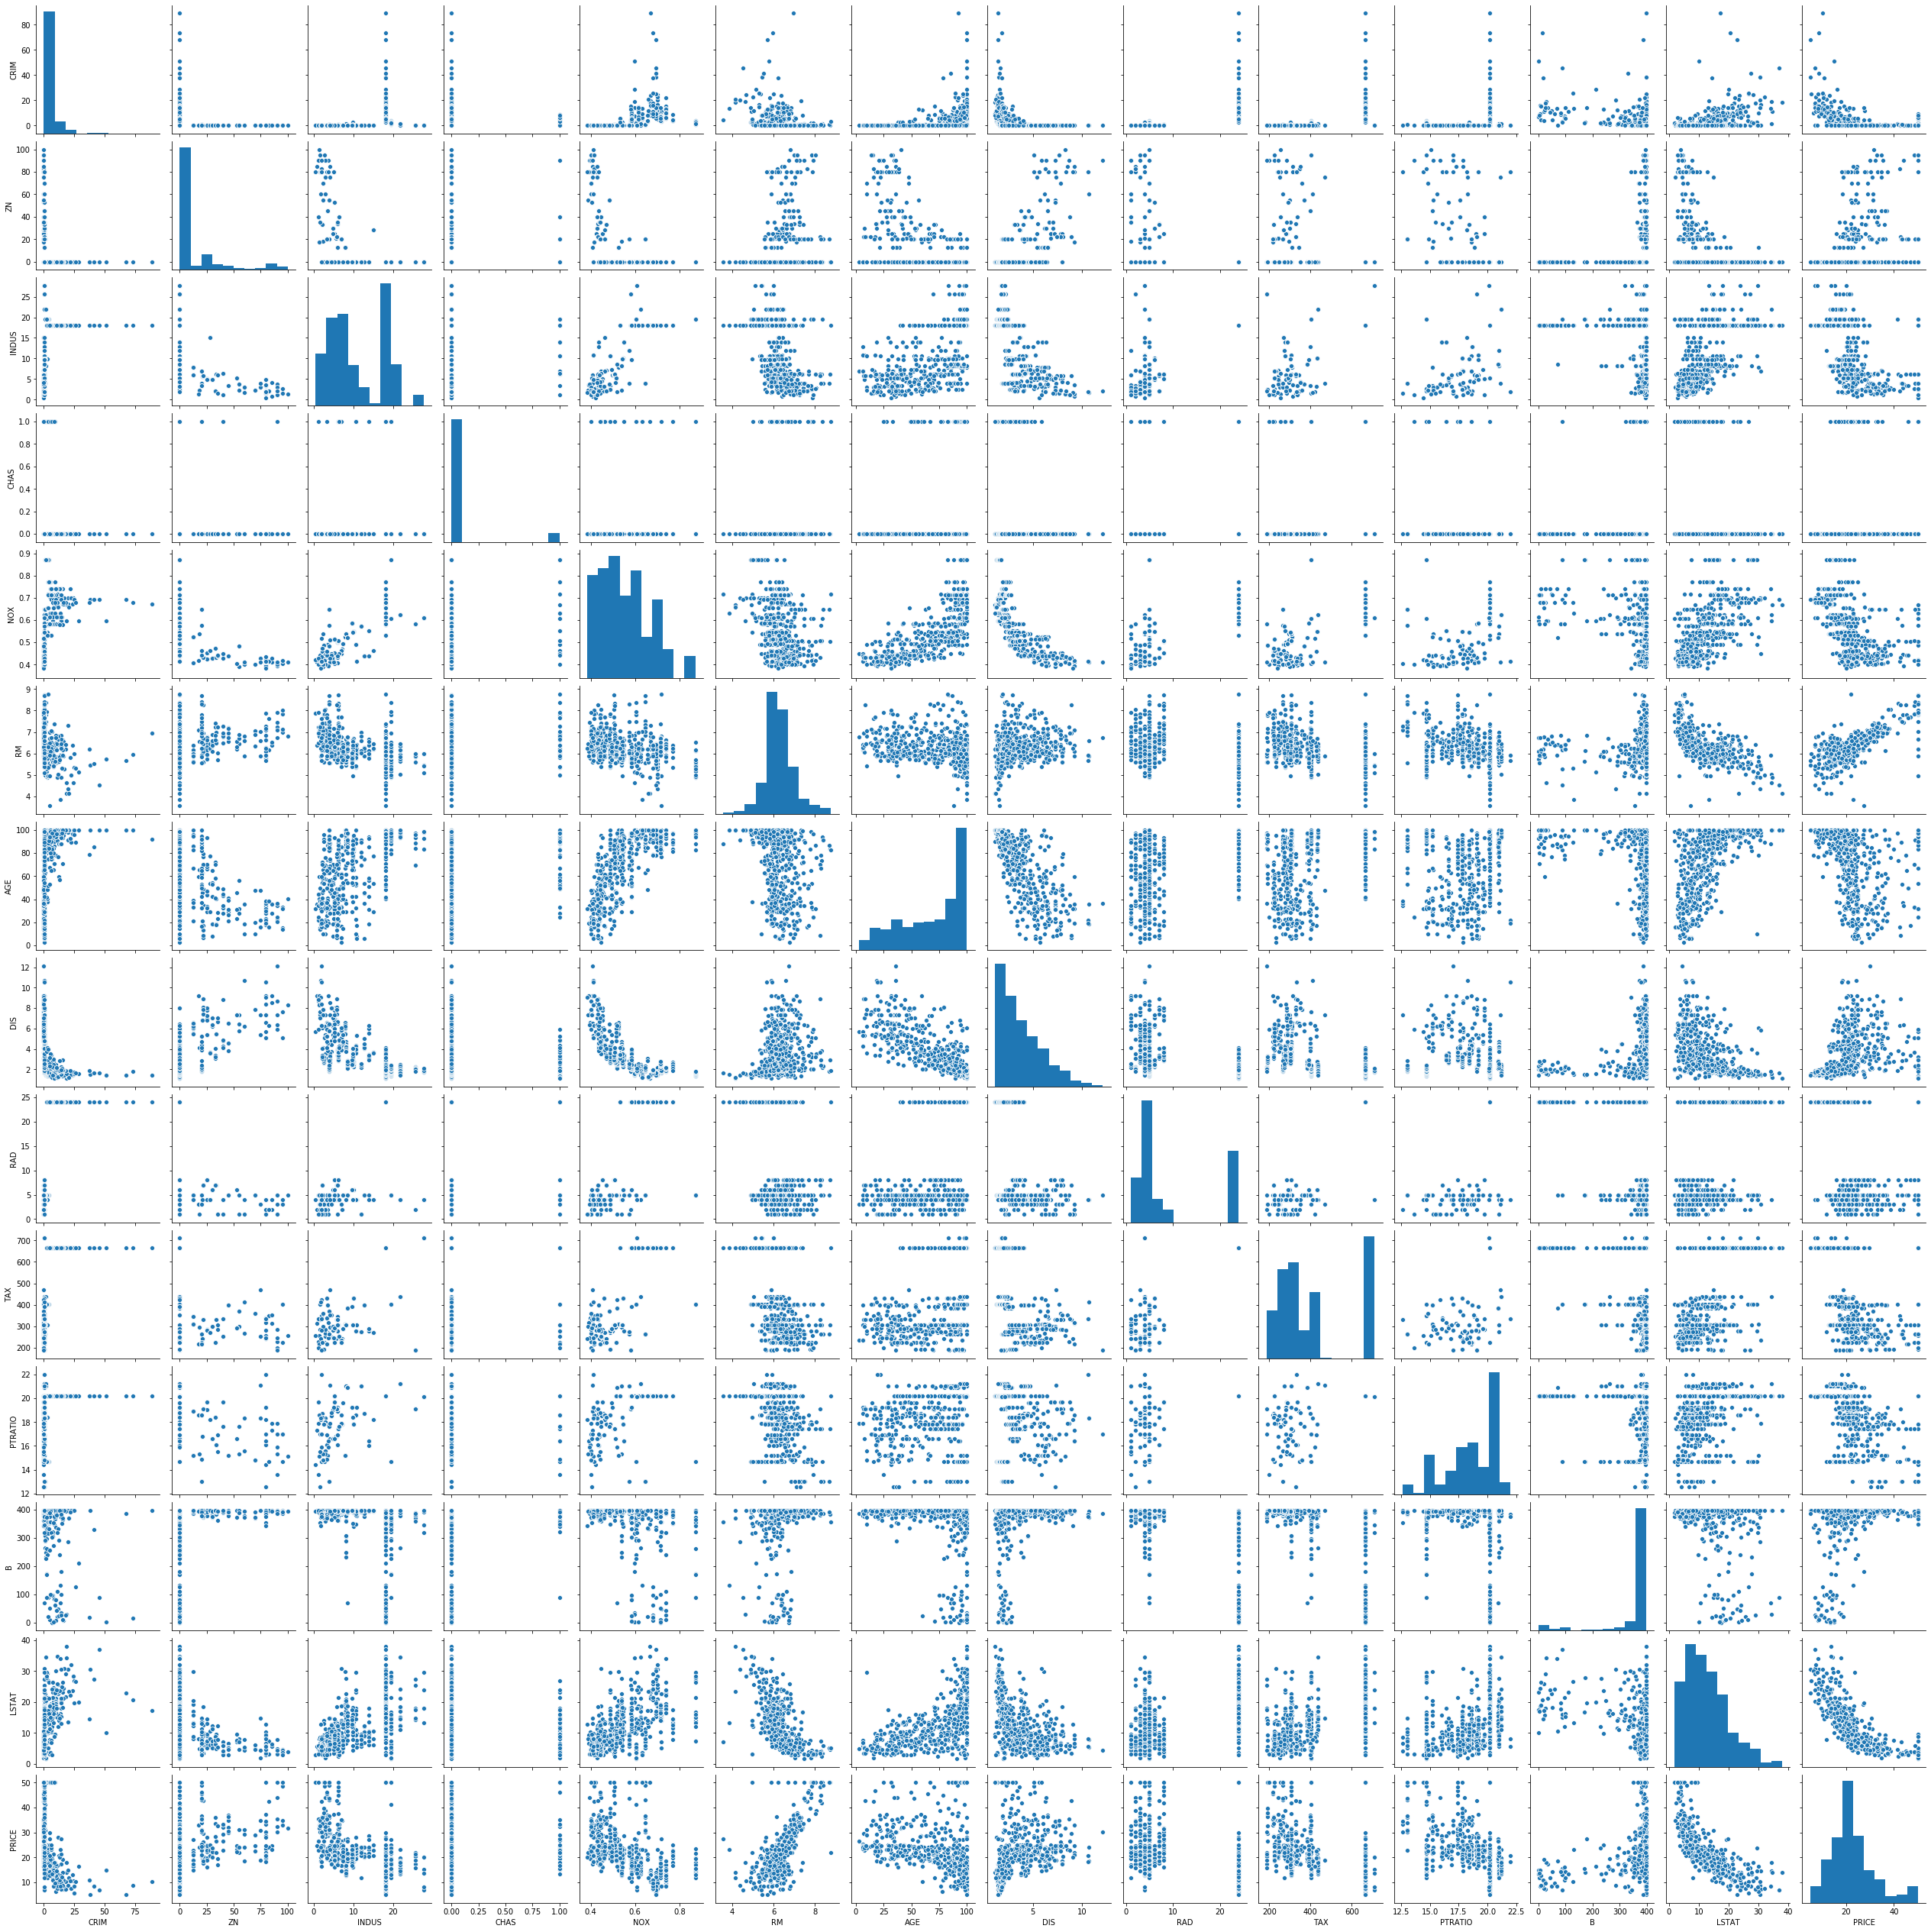

In [60]:
sns.pairplot(df)

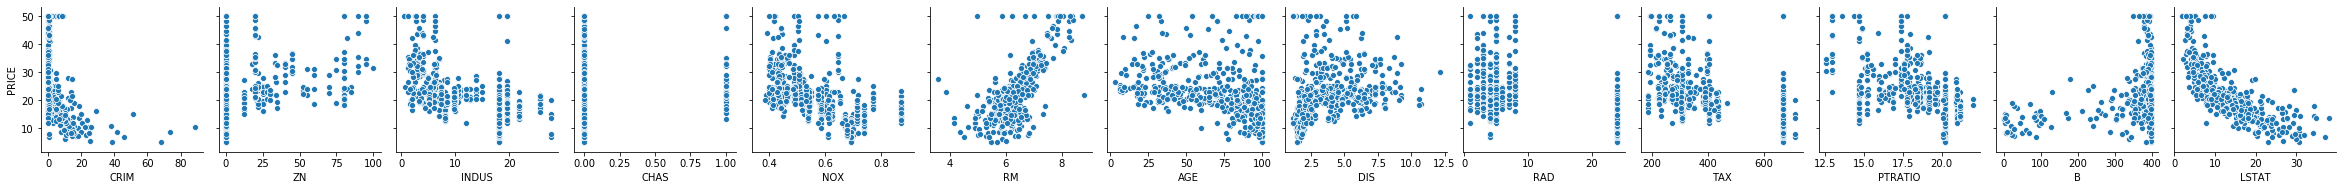

In [76]:
sns.pairplot(df, x_vars=x_cols, y_vars='PRICE');

In [74]:
import plotly.express as px

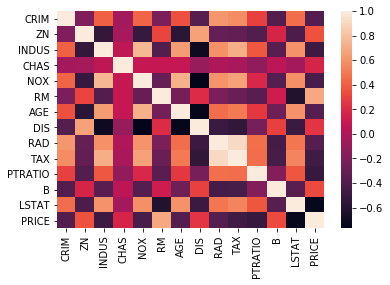

In [79]:
sns.heatmap(df.corr());

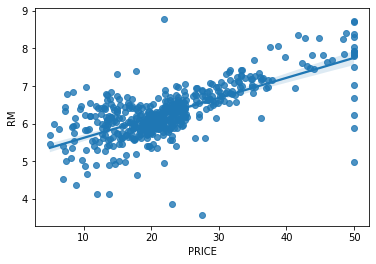

In [81]:
sns.regplot(df['PRICE'], df['RM']);